In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Q4.1

In [2]:
df = pd.read_csv('output41.csv', float_precision=None)
df.head()

,size,p,runtime
0,100,1,0.161060
1,100,1,0.160765
2,100,1,0.160893
3,100,2,0.081979
4,100,2,0.080884


In [3]:
df_hund = df[:21].copy(deep=True)
df_thou = df[21:].copy(deep=True)
df_thou.index = [i for i in range(len(df_thou))]
df_hund.index = [j for j in range(len(df_hund))]

In [4]:
df.loc[0, 'runtime']

0.16106

In [5]:
th_dic = {
    'p':[],
    'runtime':[]
}
hun_dic = th_dic

In [6]:
def minimization_41(data,dt_dict):
    for i in range(0,len(data),3):
        dt_dict['p'].append(data.loc[i,'p'])
        dt_dict['runtime'].append(min(data.loc[i:i+2,'runtime']))
    return pd.DataFrame(dt_dict, index=dt_dict['p'])

df_hund = minimization_41(df_hund,th_dic)
df_thou = minimization_41(df_thou, th_dic)

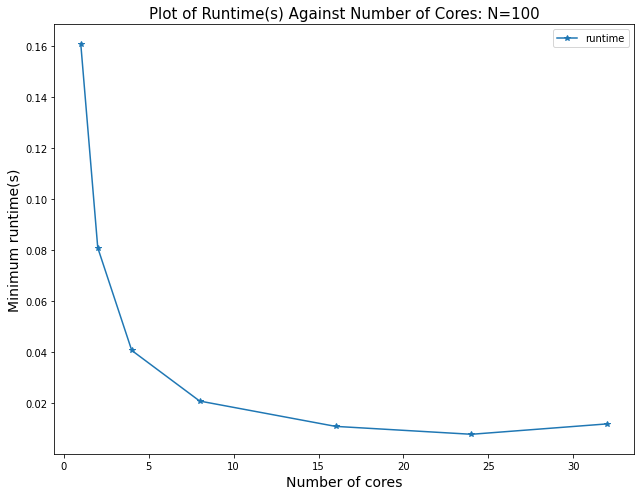

In [7]:
fig, ax = plt.subplots(figsize=(9,7))
df_hund.set_index('p').plot(marker='*',ax=ax)
ax.set_xlabel('Number of cores', fontsize=14)
ax.set_ylabel('Minimum runtime(s)', fontsize=14)
ax.set_title('Plot of Runtime(s) Against Number of Cores: N=100', fontsize=15)
plt.tight_layout()
plt.show()

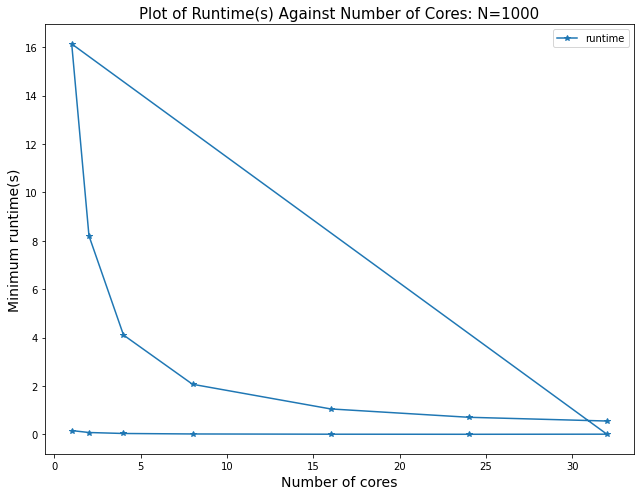

In [17]:
fig, ax1 = plt.subplots(figsize=(9,7))
df_thou.set_index('p').plot(marker='*',ax=ax1)
ax1.set_xlabel('Number of cores', fontsize=14)
ax1.set_ylabel('Minimum runtime(s)', fontsize=14)
ax1.set_title('Plot of Runtime(s) Against Number of Cores: N=1000', fontsize=15)
plt.tight_layout()
plt.show()

# Q4.2

In [9]:
df_2 = pd.read_csv('output42.csv', float_precision=None)
df_2

,schedule,size,p,runtime
0,static,1000,16,2.428213
1,static,1000,16,2.429531
2,static,1000,16,2.428950
3,"static,1",1000,16,1.030901
4,"static,1",1000,16,1.037905
5,"static,1",1000,16,1.031392
6,"dynamic,1",1000,16,1.054605
7,"dynamic,1",1000,16,1.065947
8,"dynamic,1",1000,16,1.051735
9,"guided,10",1000,16,1.399532


In [10]:
df42_dict = {
    'schedule':[],
    'runtime':[]
}

In [11]:
def minimization_42(data,dt_dict,index,target):
    for i in range(0,len(data),3):
        dt_dict[index].append(data.loc[i,index])
        dt_dict[target].append(min(data.loc[i:i+2,target]))
    return pd.DataFrame(dt_dict)

df42_min = minimization_42(df_2,df42_dict, "schedule", "runtime")
df42_min.set_index("schedule", inplace=True)
df42_min

,runtime
schedule,
static,2.428213
"static,1",1.030901
"dynamic,1",1.051735
"guided,10",1.399046


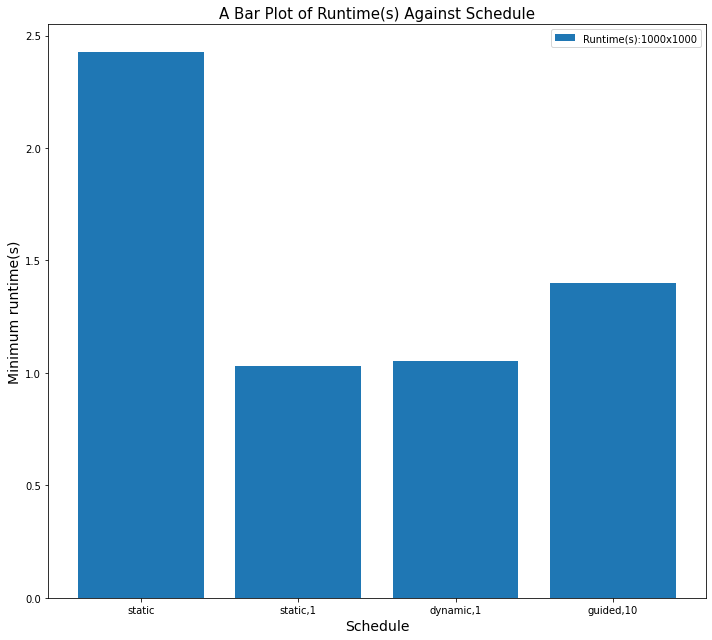

In [12]:
fig, ax = plt.subplots(figsize=(10,9))
ax.bar(df42_min.index,df42_min.runtime, label='Runtime(s):1000x1000')
ax.set_xlabel('Schedule', fontsize=14)
ax.set_ylabel('Minimum runtime(s)', fontsize=14)
ax.set_title('A Bar Plot of Runtime(s) Against Schedule', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

# Q5.1

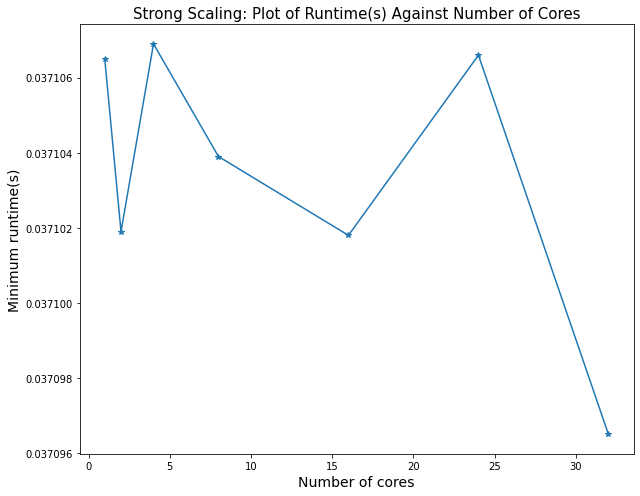

In [13]:
df51 = pd.read_csv('output51.csv', float_precision=None)
df51.drop(['r','width'], axis=1,inplace=True)
df51_dict = {
    'p':[],
    'runtime':[]
}
index="p"
target="runtime"
def minimization_51(data,dt_dict,index,target):
    for i in range(0,len(data),3):
        dt_dict[index].append(data.loc[i,index])
        dt_dict[target].append(min(data.loc[i:i+2,target]))
    return pd.DataFrame(dt_dict)

df51 = minimization_51(df51,df51_dict,index , target)
# df51.set_index(index, inplace=True)


fig, ax = plt.subplots(figsize=(9,7))
# df51.plot(marker='*',ax=ax)
ax.plot(df51.p, df51.runtime, marker='*')
ax.set_xlabel('Number of cores', fontsize=14)
ax.set_ylabel('Minimum runtime(s)', fontsize=14)
ax.set_title('Strong Scaling: Plot of Runtime(s) Against Number of Cores', fontsize=15)
plt.tight_layout()
plt.show()

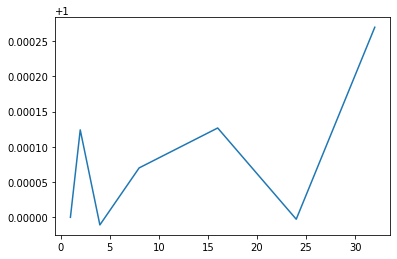

In [14]:
df51['scaled'] = [df51.loc[0,'runtime']/k for k in df51.runtime]
plt.plot(df51.p, df51.scaled)

# Q5.2

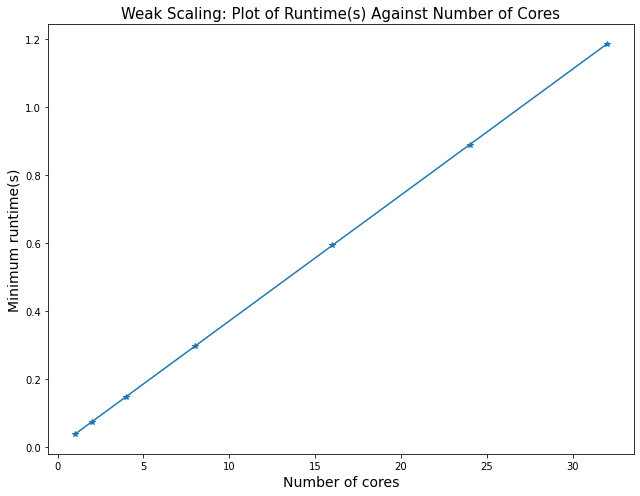

In [15]:
df52 = pd.read_csv('output52.csv', float_precision=None)
df52.drop(['r','width'], axis=1,inplace=True)
df52_dict = {
    'p':[],
    'runtime':[]
}
index="p"
target="runtime"
def minimization_51(data,dt_dict,index,target):
    for i in range(0,len(data),3):
        dt_dict[index].append(data.loc[i,index])
        dt_dict[target].append(min(data.loc[i:i+2,target]))
    return pd.DataFrame(dt_dict)

df52 = minimization_51(df52,df52_dict,index , target)
# df52.set_index(index, inplace=True)


fig, ax = plt.subplots(figsize=(9,7))
# df52.plot(marker='*',ax=ax)
ax.plot(df52.p, df52.runtime, marker='*')
ax.set_xlabel('Number of cores', fontsize=14)
ax.set_ylabel('Minimum runtime(s)', fontsize=14)
ax.set_title('Weak Scaling: Plot of Runtime(s) Against Number of Cores', fontsize=15)
plt.tight_layout()
plt.show()

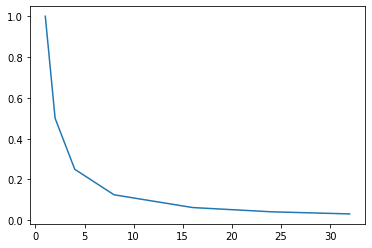

In [16]:
df52['scaled'] = [df52.loc[0,'runtime']/k for k in df52.runtime]
plt.plot(df52.p, df52.scaled)